### Iris Dataset
- Split the dataset into 3 parts - train, test, validation
- Define K (maximum number of features to be considered for the split)= square root of number of columns (K = M**1/2)
- Train the randomforest classifier(RF) with the data and max_features  = K
- Take a single estimator from the classifier(RF1)

---------------------------------------------------------------------------------------------------------

- Create a new object of random forest classifier(RFa)
- Use the single estimator(RF1) from the previous object in the new object(RFa)
- Predict using the same dataset and compare the outputs

#### Conclusion : 

- The score of the 2 models are different (RF and RFa)
- The process is repeated after creating a new model estimator (RFb) combining multiple estimators from the first model created (RF)

In [1]:
#Import Statements
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from statistics import mean
import copy 
import random
%matplotlib inline

 ### Algorithm 
 
1) N- No of samples in dataset 

2) M-No of features in dataset 

3) K-no of features for spliting the node=SQRT(M) 

4) Initialize 3*L array for storing error rates - Here L=300(No of decision trees in random forest) 

5) Create a for loop with 10 iterations 

      5.1) Split dataset into 3 with .3 as training,.3 validation and .4 as testing 
      5.2)Create a random forest object and fit it with training data (No of decision trees=300,max_features=SQRT(M) 
      5.3)Create an empty RF object for SFS 
      5.4)Create a copy of already created RF object for SBS 
      5.5)Create an empty RF object for SRS 
      5.6) Create a for loop with L iterations 
      
            5.6.1)Call the method for SFS ..Compute and store the error rates(In the 3*L array) of the newly created SFS random forest using testing dataset.  
            5.6.2)Call the method for SFS ..Compute and store the error rates(In the 3*L array)  of the newly created SFS random forest using testing dataset.  
            5.6.3)Call the method for SFS ..Compute and store the error rates(In the 3*L array)  of the newly created SFS random forest using testing dataset.  End both the for loop 
 
 6) Average the error rates for SFS,SBS and SRS

### As per algorithm

### Code for SFS
**Method for Sequential Forward selection of Classifiers**

In [2]:
def SFS_method(classifier_SFS,classifier):
    SFS_estimators = []
    error_rates_SFS = []
    SFS_estimators_temp=[]
    # creating a new list for adding new trees
    dtreeList=list(range(dTree))
    #Adding all other properties of the random forest
    classifier_SFS.classes_ = classifier.classes_
    classifier_SFS.n_classes_ = classifier.n_classes_
    classifier_SFS.n_outputs_ = classifier.n_outputs_    
    for i in range(dTree):
        error_score_=999
        estmaator_no=0
        flag=1
        classifier_SFS_temp=copy.deepcopy(classifier_SFS)
        
        for i in dtreeList:
            # assigning the added trees to the empty RF object created for SFS
            SFS_estimators_temp.append(classifier.estimators_[i])
            # assigning the number of estimators to the SFS object
            classifier_SFS_temp.estimators_ = SFS_estimators_temp
           # print(SFS_estimators_temp)
            classifier_SFS_temp.n_estimators = len(classifier_SFS_temp)
            # predicting using the SFS estimator
            y_pred = classifier_SFS_temp.predict(X_val)
            
            # calculating the missclassification score using validation set
            error_score = zero_one_loss(y_val, y_pred,normalize=True)
            #print(dtreeList)
            #print(i)
            #print(error_score)
            if (error_score<error_score_):
                error_score_=error_score                
                estmaator_no=i
                flag=0  
                #print(error_score_,"error_score_",estmaator_no,"estmaator_no")
            SFS_estimators_temp.remove(classifier.estimators_[i])
            
        if(flag==0):
            SFS_estimators.append(classifier.estimators_[estmaator_no])
            classifier_SFS.estimators_ = SFS_estimators            
            classifier_SFS.n_estimators = len(classifier_SFS)
            y_test_pred=classifier_SFS.predict(X_test)
            error_score_test = zero_one_loss(y_test, y_test_pred,normalize=True)
            error_rates_SFS.append(error_score_test)  
            
        dtreeList.remove(estmaator_no)            
        SFS_estimators_temp=classifier_SFS.estimators_
    # appending score to a list
    
    return error_rates_SFS


### Code for SBS
**Method for Backward sequential elemination of classifiers**

In [3]:
#Method for Backward sequential elemination of classifiers
#Input 2 Random Forest classifier
def SBS_method(classifier_SBS,classifier):
    
    #length of  the initial random forest object 
    lengthSubforest=len(classifier_SBS.estimators_)
    
    #Copy the estimators of initial random forest 
    SBS_estimators = copy.deepcopy(classifier_SBS.estimators_)
    
    #Empty list to store error value
    error_rates_SBS = []
    
    #Initial predict
    # Predicting using the SBS estimator
    y_test_pred=classifier_SBS.predict(X_test)
            
    # Calculating the missclassification score using validation set
    error_score_test = zero_one_loss(y_test, y_test_pred,normalize=True)
            
    # Appending error score to a list
    error_rates_SBS.append(error_score_test)
    #print(error_rates_SBS,"---error_rates_SBS")
    
    
    SBS_estimators_temp=copy.deepcopy(classifier_SBS.estimators_)
    #print(SBS_estimators_temp,"---SBS_estimators_temp")
    
    # creating a new list for removing the trees
    dtreeList=list(range(dTree))   
    
    for i in range(dTree):
        error_score_=999
        flag=1
        
        classifier_SBS_temp=copy.deepcopy(classifier_SBS)
        
        for i in SBS_estimators_temp:
            
            if(len(SBS_estimators_temp)<=1):
                break
            # List after removal of the tree from the orginal random forest to get better accuracy
            #print(SBS_estimators_temp,"---SBS_estimators_temp")
            #print(i)
            remove_tree=i
            SBS_estimators_temp.remove(i)
            #print(SBS_estimators_temp,"---SBS_estimators_temp after removal")
            
            # Assigning the estimators to the SBS random forest object
            classifier_SBS_temp.estimators_ = SBS_estimators_temp
            #print(classifier_SBS_temp,"---classifier_SBS_temp after removal")
        
            # Assigning the length of estimators to the SBS random forest object
            classifier_SBS_temp.n_estimators = len(classifier_SBS_temp)
            #print(len(classifier_SBS_temp),"---len(classifier_SBS_temp)")
            
            # Predicting using the SBS estimator
            y_pred = classifier_SBS_temp.predict(X_val)
            #print(y_pred,"---y_pred")
            
            # Calculating the missclassification score using validation set
            error_score = zero_one_loss(y_val, y_pred,normalize=True)
            #print(error_score,"---error_score")
            
            #Storing the value  to be eleminated from the original ranndom forest that satisfies least error score
            if (error_score<error_score_):
                error_score_=error_score                
                SBS_estimators=copy.deepcopy(SBS_estimators_temp)
                flag=0  
                
            SBS_estimators_temp.append(remove_tree)
            
        if(flag==0):
            
            #print(len(SBS_estimators))
            classifier_SBS.estimators_ = SBS_estimators            
            classifier_SBS.n_estimators = len(classifier_SBS)

            # Predicting using the SBS estimator
            y_test_pred=classifier_SBS.predict(X_test)

            # Calculating the missclassification score using validation set
            error_score_test = zero_one_loss(y_test, y_test_pred,normalize=True)

            # Appending error score to a list
            error_rates_SBS.append(error_score_test)
            #print(error_rates_SBS,"---error_rates_SBS")

            lengthSubforest=len(classifier_SBS)            
            #print(lengthSubforest,"---lengthSubforest")

            SBS_estimators_temp=classifier_SBS.estimators_ 
                
        else:
            break
               
         

    #Return th error list
    return error_rates_SBS

### Code for SRS
**Method for random sequential selection of classifier**

In [4]:
#Method for random sequential selection of classifiers
def SRS_method(classifier_SRS,classifier):
    #Empty array for estimators
    SRS_estimators = []
    #Array for storing error
    error_rates_SRS = []
    #List of indices of estimators in the initial random forest
    dtreeList=list(range(dTree))
    
    #For loop to randomly select the estimators from random forest
    for i in range(dTree):
        #Choose random K value from the List of estimators
        k=random.choice(dtreeList)
        #print(k)
        
        # Append kth estimator to the array of estimators
        SRS_estimators.append(classifier.estimators_[k])
        
        # Add the estimator to the random forest 
        classifier_SRS.estimators_ = SRS_estimators
        
        # Assigning the estimator number to RF object
        classifier_SRS.n_estimators = len(classifier_SRS)
        #print(len(classifier_SRS))
        
        #Providing RF object with variables same as that of original random forest 
        classifier_SRS.classes_ = classifier.classes_
        classifier_SRS.n_classes_ = classifier.n_classes_
        classifier_SRS.n_outputs_ = classifier.n_outputs_
        
        # Predicting using the new SRS random forest
        y_pred = classifier_SRS.predict(X_test)
        
        # Calculating the error score
        error_score = zero_one_loss(y_test, y_pred,normalize=True)
        #print(error_score)
        
        # Appending score to a list
        error_rates_SRS.append(error_score)
        #print(error_rates_SRS)
        
        #Removing the already added tree indices from list of estimators that are to be added
        dtreeList.remove(k) 
        #print(dtreeList)
        
    return error_rates_SRS

### Method for Data Retrieval and Preprocessing

### Data set to split to Test and Train

In [5]:
def data_split():    
    #To split the dataset into 3 parts   
    X_train, X_test, y_train, y_test= train_test_split(X_Data, y_Target, test_size=0.4)
    X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.5)
    
    return X_train,X_val,X_test,y_train,y_val,y_test

In [6]:
#Iris Dataset from UCI
#https://archive.ics.uci.edu/ml/datasets/iris
def get_IrisData():
    #Reading dataset from the csv file
    df_iris=pd.read_csv('iris.csv')
    print("Data Description")
    print(df_iris.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_iris.index)
    df_iris=df_iris.loc[shuffled_index]
    #NonUniform distribution of data
    print("Data Distribution")
    df_iris['species'].value_counts().sort_index().plot.bar()
    plt.show() 
    print("Nan Values if any")
    print(df_iris.isna().sum())
    print("Data Types")
    print(df_iris.dtypes)
    print("Data Set")
    print(df_iris.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_iris.drop('species', axis = 1)
    y=df_iris['species']
    print("Iris Dataset")
    print(X.head(5))
    print("Class Column")
    print(y.head(5))
    return X, y



Data Description
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Data Distribution


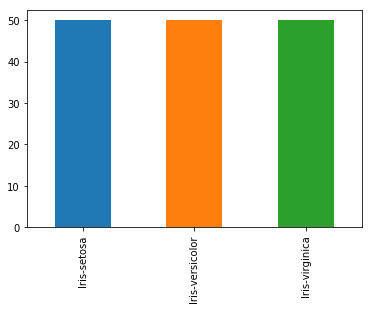

Nan Values if any
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Data Types
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Data Set
     sepal_length  sepal_width  petal_length  petal_width          species
14            5.8          4.0           1.2          0.2      Iris-setosa
98            5.1          2.5           3.0          1.1  Iris-versicolor
75            6.6          3.0           4.4          1.4  Iris-versicolor
16            5.4          3.9           1.3          0.4      Iris-setosa
131           7.9          3.8           6.4          2.0   Iris-virginica
Iris Dataset
     sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
98            5.1          2.5           3.0          1.1
75            6.6          3.0           4.4          1.4
16            5.4          3.9

In [7]:

# #Data Set Reading
# # list for column headers
# names = ['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']
# df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",names=names)
# global N,M
# N,M=df.shape
# df.head()
# #To convert into Target and Attributes
# X_Data = df.drop("Class", axis=1)
# y_Target = df["Class"]
# print(N,M)
# print(X_Data.shape)

#Titanic Data
X_Data,y_Target=get_IrisData()
N,M=X_Data.shape


In [ ]:
# number of decision trees
dTree = 500
# number of features for split
K = int(M**(1/2))
# empty array for error rates
error_rates_SFS, error_rates_SBS, error_rates_SRS = [], [], []
# list to store the trees
error_rate_SFS_10,error_rate_SBS_10,error_rate_SRS_10 = [], [], []

# for loop 
for i in range(10):
    X_train, X_val, X_test, y_train, y_val, y_test = data_split()
    # Random forest model 
    classifier = RandomForestClassifier(n_estimators=dTree, max_features=K)
    # fit the classifier with data
    classifier.fit(X_train, y_train)
    
    # empty RF object for SFS
    classifier_SFS = RandomForestClassifier()
    error_rates_SFSMain=SFS_method(classifier_SFS,copy.deepcopy(classifier))
    error_rate_SFS_10.append(error_rates_SFSMain)
    
    # copy of already created RF object for SBS
    classifier_SBS = copy.deepcopy(classifier)
    error_rates_SBSMain=SBS_method(classifier_SBS,copy.deepcopy(classifier))
    error_rate_SBS_10.append(error_rates_SBSMain)
    
    # empty RF object for SRS
    
    classifier_SRS = RandomForestClassifier()
    error_rates_SRSMain=SRS_method(classifier_SRS,copy.deepcopy(classifier))
    error_rate_SRS_10.append(error_rates_SRSMain)



### Observation For Iris Dataset-SEQUENTIAL FORWARD SELECTION

In [16]:
df_SFS_IRIS = pd.DataFrame(error_rate_SFS_10)
df_SFS_IRIS

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.083333,0.083333,0.066667,0.083333,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
1,0.066667,0.066667,0.066667,0.050000,0.066667,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2,0.083333,0.100000,0.083333,0.066667,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.050000,0.050000,0.050000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
4,0.033333,0.050000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000


### Observation For Iris Dataset-SEQUENTIAL BACKWARD SELECTION

In [17]:
df_SBS_digit = pd.DataFrame(error_rate_SBS_10)
df_SBS_digit

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.066667,0.066667,0.066667,0.083333,0.050000,0.083333,0.066667,0.066667,0.066667,0.066667
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.066667,0.066667,0.066667,0.066667,0.083333,0.083333,0.083333,0.066667,0.050000,0.066667


### Observation For Iris Dataset-SEQUENTIAL RANDOM SELECTION

In [18]:
df_SRS_digit = pd.DataFrame(error_rate_SRS_10)
df_SRS_digit

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.100000,0.100000,0.100000,0.116667,0.066667,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
1,0.083333,0.133333,0.083333,0.050000,0.066667,0.033333,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2,0.016667,0.050000,0.083333,0.083333,0.100000,0.100000,0.100000,0.083333,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.166667,0.283333,0.033333,0.166667,0.050000,0.050000,0.033333,0.083333,0.050000,0.083333,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
